# **CZ1115 Mini-Project**
#### Group 3
Lin Jiajun <br>
Max Tan Zheyuan <br>
Ng Tze Sheng <br>

---



# **Project Overview**
### 1. Problem Definition
### 2. Data Preparation & Cleaning
### 3. Exploratory Data Analysis & Visualisation
### 4. Classification And Regression Tree (CART)
### 5. Random Forest
### 6. Data-driven Insights & Recommendations


# **1. Problem Definition**
One key benefit of machine learning is its ability to utilise large amounts of data to make data-driven decisions. Our team has decided to apply machine learning to the field of medical diagnosis, with the aim of using health data (of patients) to make accurate predictions of health conditions. Additionally, we would like to identify the important risk factors (variables) associated with the disease.

We found a relevant dataset on heart disease, taken from the UCI Machine Learning Repository. It contains data of 303 patients, with 14 different variables which may be relevant in predicting the presence of heart disease.

In our project, we will be applying Classification and Regression Tree (CART) and Random Forest to try and predict the presence of heart disease among patients, as well as to identify the important variables in making accurate diagnosis.

# **2. Data Preparation & Cleaning**

The next step of our data science pipeline would be to prepare the data. In this section, we cover the following items.

<br/>

**Load Dependencies**  
There are many useful libraries which we will be utilising in our project. They help us with tasks like data processing,  graph visualisations, model development and model assessment.

<br/>

**Set Seed**  
In order to achieve consistent results each time our project file is executed, we will be making use of a constant seed (random state).

<br/>

**Import Dataset**  
The dataset is downloaded from UCI Machine Learning Repository and loading into our project.

<br/>

**Data Cleaning**  
In this step, we handle cases of missing values in our dataset and ensure that variables are represented by the appropriate data type (integer, floats, characters, factors, etc.).

### Load Dependencies

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
# CART
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
# Neural Network
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

### Set Seed

In [3]:
# set seed
seed = 2022

### Import Dataset

Dataset url: https://archive.ics.uci.edu/ml/datasets/heart+Disease 

- The "target" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4
- This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them

In [4]:
heartdata = pd.read_csv('heart.csv', header = None)

heartdata.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
# Dataset is now stored in a Pandas Dataframe

In [5]:
heartdata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


**Attribute Information / Data Dictionary**

1. age : age in years
2. sex : sex 
 - 0: female
 - 1: male
3. cp : cp: chest pain type 
  - 1: typical angina 
  - 2: atypical angina 
  - 3: non-anginal pain 
  - 4: asymptomatic  
4. trestbps : resting blood pressure (in mmHg on admission to the hospital) 
5. chol : serum cholestoral in mg/dl  
6. fbs : fasting blood sugar > 120 mg/dl 
  - 0: false
  - 1: true
7. restecg : resting electrocardiographic results 
  - 0: normal 
  - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
  - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. thalach : maximum heart rate achieved 
9. exang : exercise induced angina
  - 0: no
  - 1: yes
10. oldpeak : ST depression induced by exercise relative to rest 
11. slope : the slope of the peak exercise ST segment 
  - 1: upsloping 
  - 2: flat 
  - 3: downsloping
12. ca : number of major vessels (0-3) colored by flouroscopy 
13. thal : Thalassemia, an inherited blood disorder that causes your body to have less haemoglobin than normal
  - 3 = normal
  - 6 = fixed defect
  - 7 = reversable defect
14. target : diagnosis of heart disease (angiographic disease status) 
  - It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

### Data Cleaning

In [6]:
heartdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


The dataframe consists of 14 columns and 303 rows. No null values are observed for all 14 attributes.

**Data Type Conversion**

Next, we will be converting the data types of some variables from float64 (floating point numbers) to int64 (integers). This is due to the improved efficiency of our program in dealing with int64 datatypes as opposed to float64 datatypes. Of course, we will be checking that the type conversion can be done without affecting the integrity of the data.  
i.e. only if all values in the column can be represented by an integer (without a loss in precision), will we convert their datatype from float64 to int64.

In [7]:
# convert to integer if possible
for col in heartdata:
  # check if can safely convert to integer
  if heartdata[col].dtypes == 'float64' and heartdata[col].apply(float.is_integer).all() == True:
    heartdata[col] = heartdata[col].astype(int)

heartdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


**Check for Categorical Values**

Based on the data dictionary, we check if the attributes that are categorical in nature are indeed represented as categorical datatypes in our dataframe. Upon inspection, we will need to convert the following variables to categorical variables:
1. sex
2. cp
3. fbs
4. restecg
5. exang
6. slope
7. ca
8. thal
9. target

In [8]:
cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
for col in cols:
  print(col, ":", heartdata[col].unique())

sex : [1 0]
cp : [1 4 3 2]
fbs : [1 0]
restecg : [2 0 1]
exang : [0 1]
slope : [3 2 1]
ca : ['0.0' '3.0' '2.0' '1.0' '?']
thal : ['6.0' '3.0' '7.0' '?']
target : [0 2 1 3 4]


We observed that for 'ca' and 'thal', there are certain rows with values = ?  
The incomplete or erroneous data could affect the later steps of the pipeline (such as model development) and thus will need to be handled.

In [9]:
# Check ca
heartdata['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

First, we locate the row(s) with the missing value.

In [10]:
heartdata.loc[heartdata['ca'] == '?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
166,52,1,3,138,223,0,0,169,0,0.0,1,?,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,?,7.0,1
287,58,1,2,125,220,0,0,144,0,0.4,2,?,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


4 out of a total of 303 rows were found to have their 'ca' values as '?'. As this was a small fraction of our data, we decided to remove these rows from our analysis.

In [11]:
heartdata = heartdata.loc[heartdata['ca'] != '?']
heartdata['ca'].unique() # check if removed

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

Likewise, we locate the row(s) with missing values for 'thal'.

In [12]:
heartdata.loc[heartdata['thal'] == '?']


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,?,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,?,2


Both rows with missing values for 'thal' are removed from our analysis to prevent any possible biases in our model.

In [13]:
heartdata = heartdata[heartdata['thal'] != '?']
heartdata['thal'].unique() # check if removed

array(['6.0', '3.0', '7.0'], dtype=object)

After removing the rows with missing values, we convert the respective variables to categorical data types.

In [14]:
# Convert columns to category
heartdata[cols] = heartdata[cols].astype('category')
heartdata.info() # Check if converted

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       297 non-null    int64   
 1   sex       297 non-null    category
 2   cp        297 non-null    category
 3   trestbps  297 non-null    int64   
 4   chol      297 non-null    int64   
 5   fbs       297 non-null    category
 6   restecg   297 non-null    category
 7   thalach   297 non-null    int64   
 8   exang     297 non-null    category
 9   oldpeak   297 non-null    float64 
 10  slope     297 non-null    category
 11  ca        297 non-null    category
 12  thal      297 non-null    category
 13  target    297 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 17.9 KB


**Converting the 'target' variable**

Currently, 'target' ranges from 0 to 4, corresponding to the different levels of heart disease in the patient. 

However, based on our problem definition, we are keen on analysing the key variables that are important in predicting the presence of heart disease. Hence, only the presence or absence of heart disease is of concern.

Furthermore, the distribution of 'target' is fairly skewed, with most patients classified as having no heart disease (target = 0). In order to achieve a more balanced dataset, we will be converting the 'target' variable from a quinary variable to a binary one, where '0' represents no heart disease and '1' represents heart disease.

i.e. Convert all 'target' = 1 - 4 to 'target' = 1

A balanced dataset helps to prevent possible biases in our model and this would provide us with a more reliable analysis.

The distribution of values before and after are plotted below:

Text(0.5, 1.0, 'Original target')

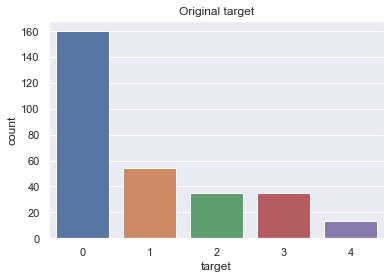

In [15]:
# Plot before
sb.countplot(data = heartdata, x = 'target').set_title('Original target')

In [16]:
heartdata['target'] = heartdata['target'].replace({2:1})
heartdata['target'] = heartdata['target'].replace({3:1})
heartdata['target'] = heartdata['target'].replace({4:1})
heartdata['target'].value_counts()

0    160
1    137
Name: target, dtype: int64

Text(0.5, 1.0, 'Re-categorised target')

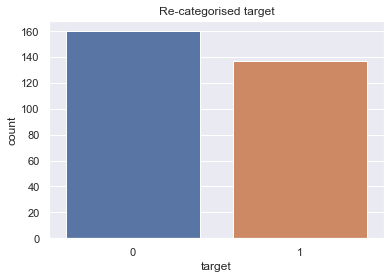

In [17]:
# Plot after
sb.countplot(data = heartdata, x = 'target').set_title('Re-categorised target')

Comparing both bar charts, we now have a relatively more balanced dataset with respect to our 'target' variable.

# **3. Exploratory Data Analysis & Visualisation**
Exploratory analysis is performed on the entire dataset.

- Pairplot & correlation matrix for continuous X variables only
  - Observe for any high correlation among variables
- Multicolinearity (but anyways our models not really affected)
- Univariate charts
  - Continuous: boxplots, histogram, density plot
  - Categorical: barcharts
- Multivariate charts
  - Cont. X & Y: boxplot
  - Cat. X & Y: barchart
- Plot in against the average benchmark values (i.e. plot in the average resting blood pressure for a person)

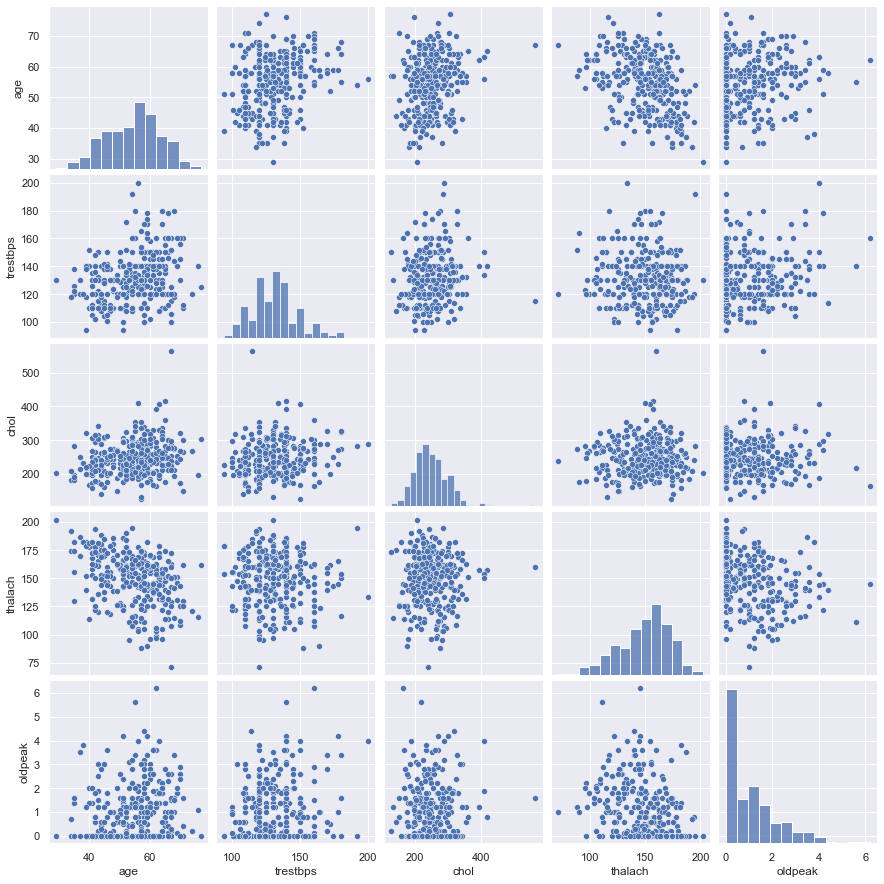

In [18]:
# Draw pairs of variables against one another
sb.pairplot(data = heartdata.select_dtypes(exclude="category"))

From the pairplot above, we can clearly see that there are no continuous variables that have an obvious linear relationship. However, to ensure that there is no multi-collinearity, it is better if we were to look at the correlation coefficient between the variables.

Multi-collinearity. If related variables are both important, then that's bad

               age  trestbps      chol   thalach   oldpeak
age       1.000000  0.290476  0.202644 -0.394563  0.197123
trestbps  0.290476  1.000000  0.131536 -0.049108  0.191243
chol      0.202644  0.131536  1.000000 -0.000075  0.038596
thalach  -0.394563 -0.049108 -0.000075  1.000000 -0.347640
oldpeak   0.197123  0.191243  0.038596 -0.347640  1.000000


<AxesSubplot:>

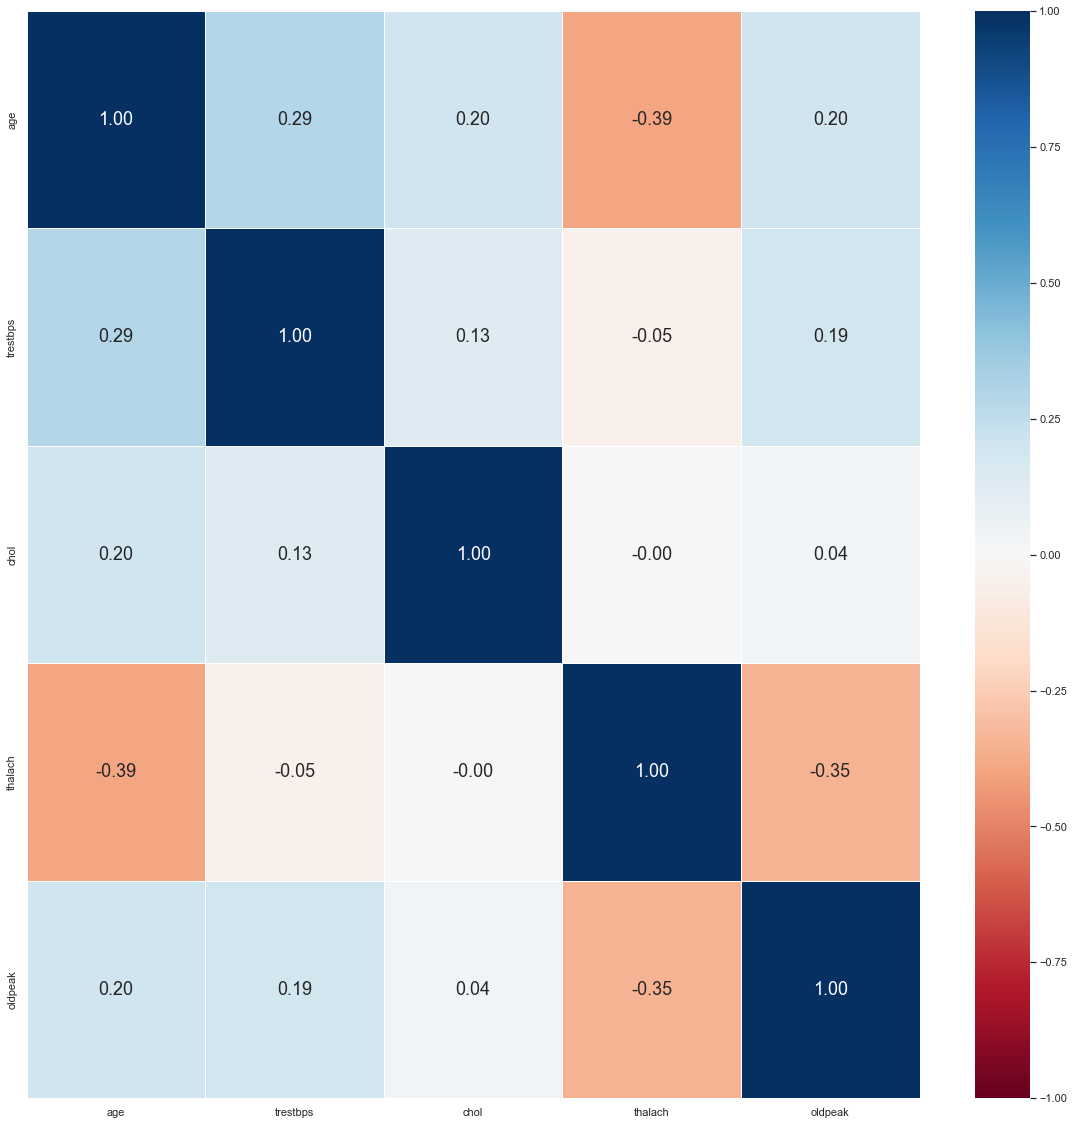

In [19]:
# Correlation Matrix
print(heartdata.select_dtypes(exclude="category").corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(heartdata.select_dtypes(exclude="category").corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

From the confusion matrix above, we can see that in general, the correlation coefficient is generally low, with the highest value being 0.29 and the lowest value being -0.39, which means that there is no multi-collinearity present in the continuous variables in our dataset.

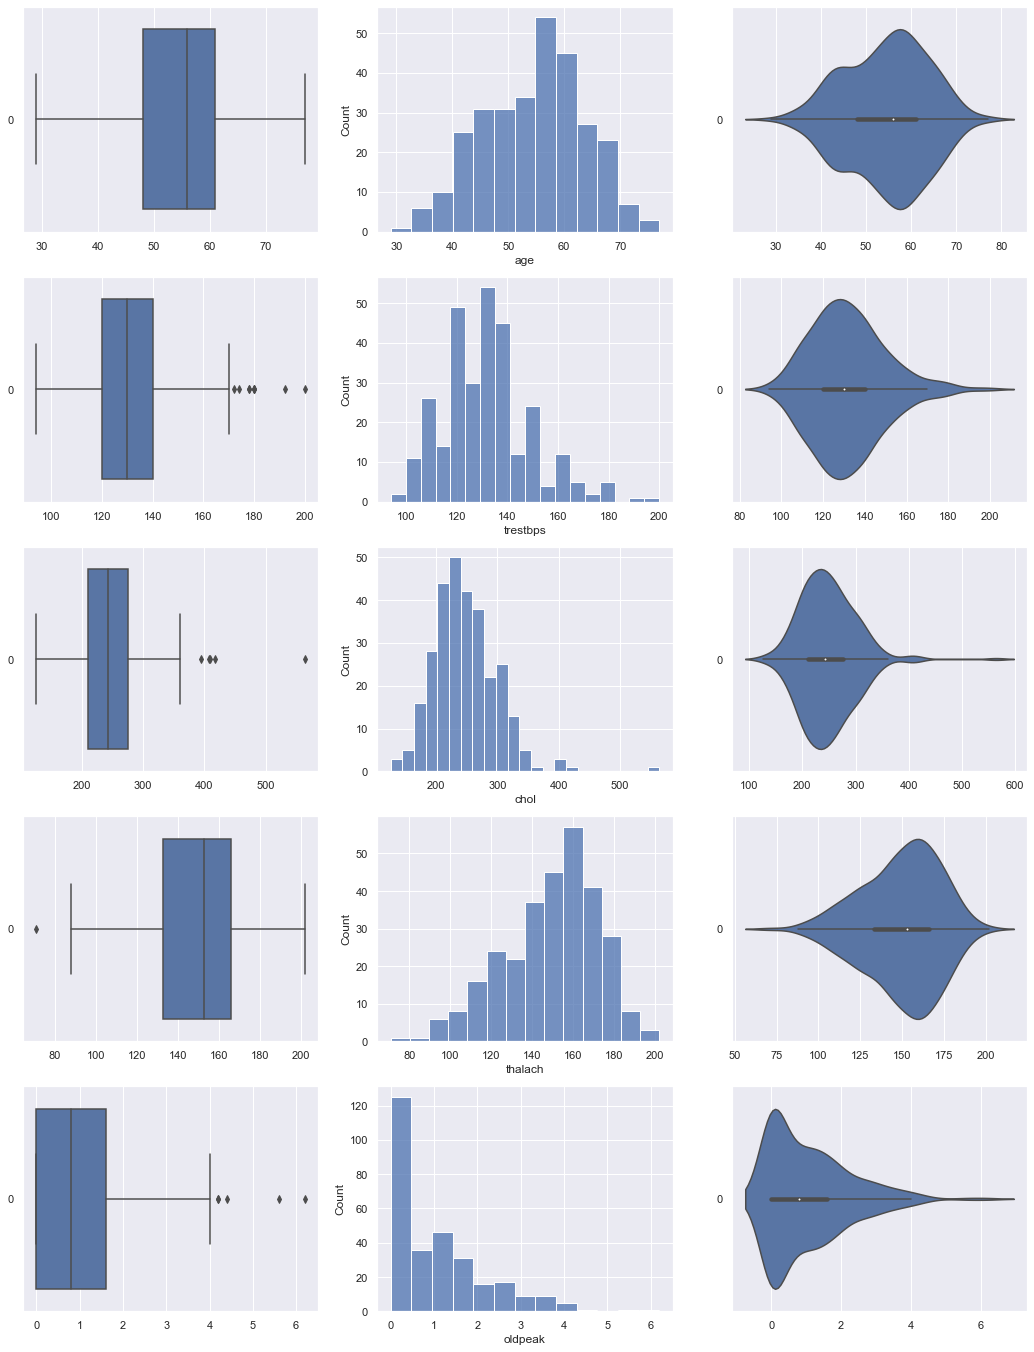

In [20]:
# Draw the distributions of all continuous variables
f, axes = plt.subplots(5, 3, figsize=(18, 24))

count = 0
for var in heartdata.select_dtypes(exclude="category").columns:
    sb.boxplot(data = heartdata.select_dtypes(exclude="category")[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = heartdata.select_dtypes(exclude="category")[var], ax = axes[count,1])
    sb.violinplot(data = heartdata.select_dtypes(exclude="category")[var], orient = "h", ax = axes[count,2])
    count += 1

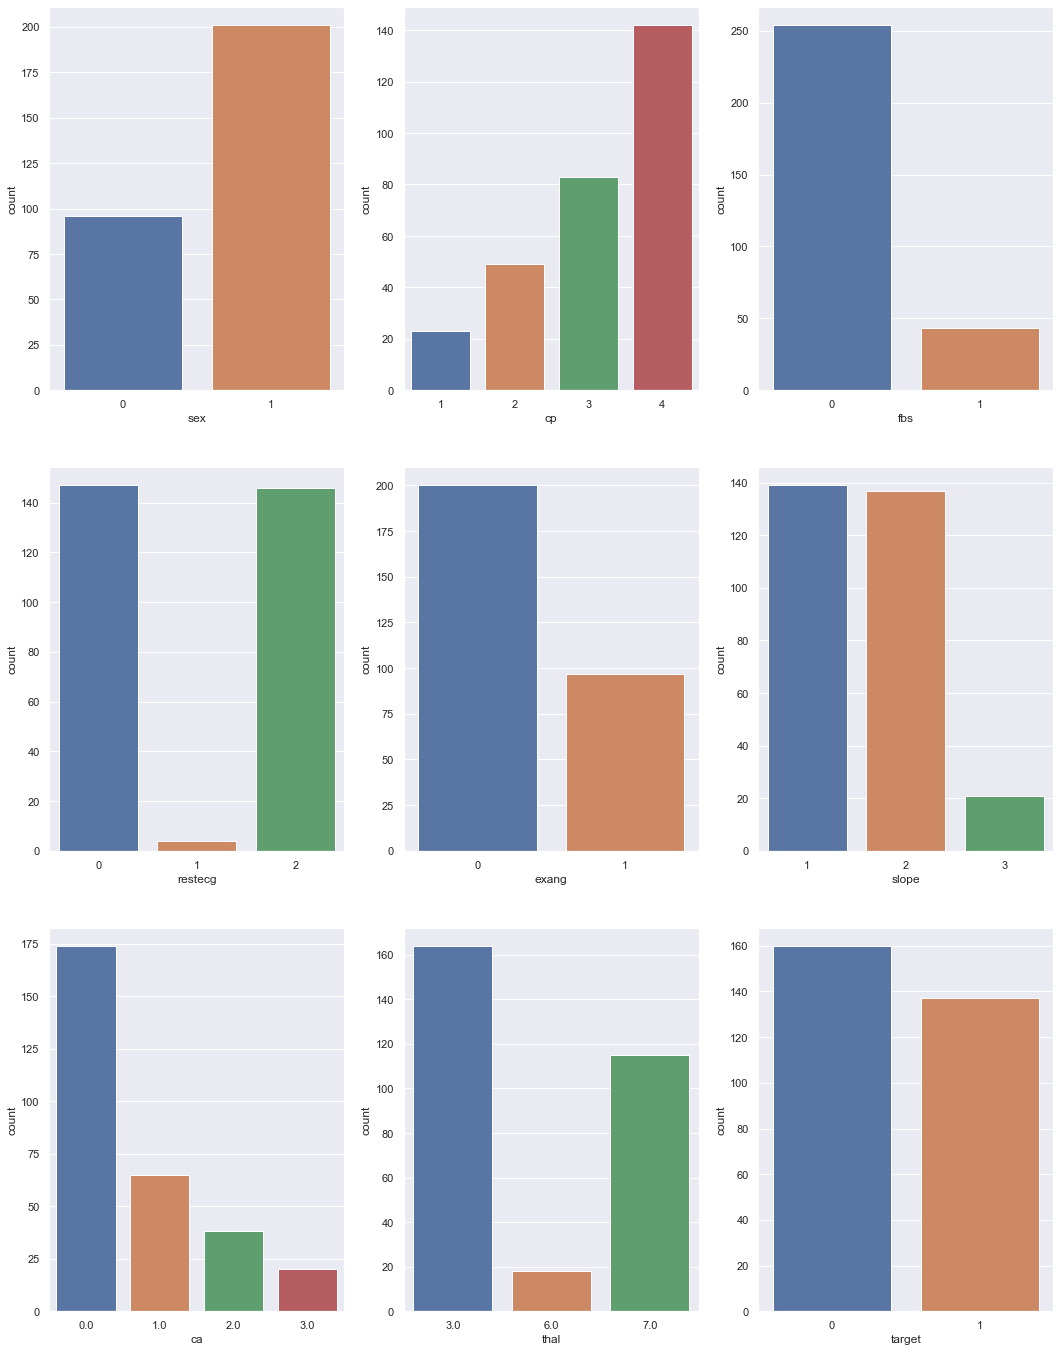

In [21]:
# Distribution of Categorical Variables
f, axes = plt.subplots(3, 3, figsize=(18, 24))

count = 0
for var in heartdata.select_dtypes("category").columns:
    sb.countplot(x = var, data = heartdata.select_dtypes("category"), ax = axes[count//3,count%3])
    count += 1

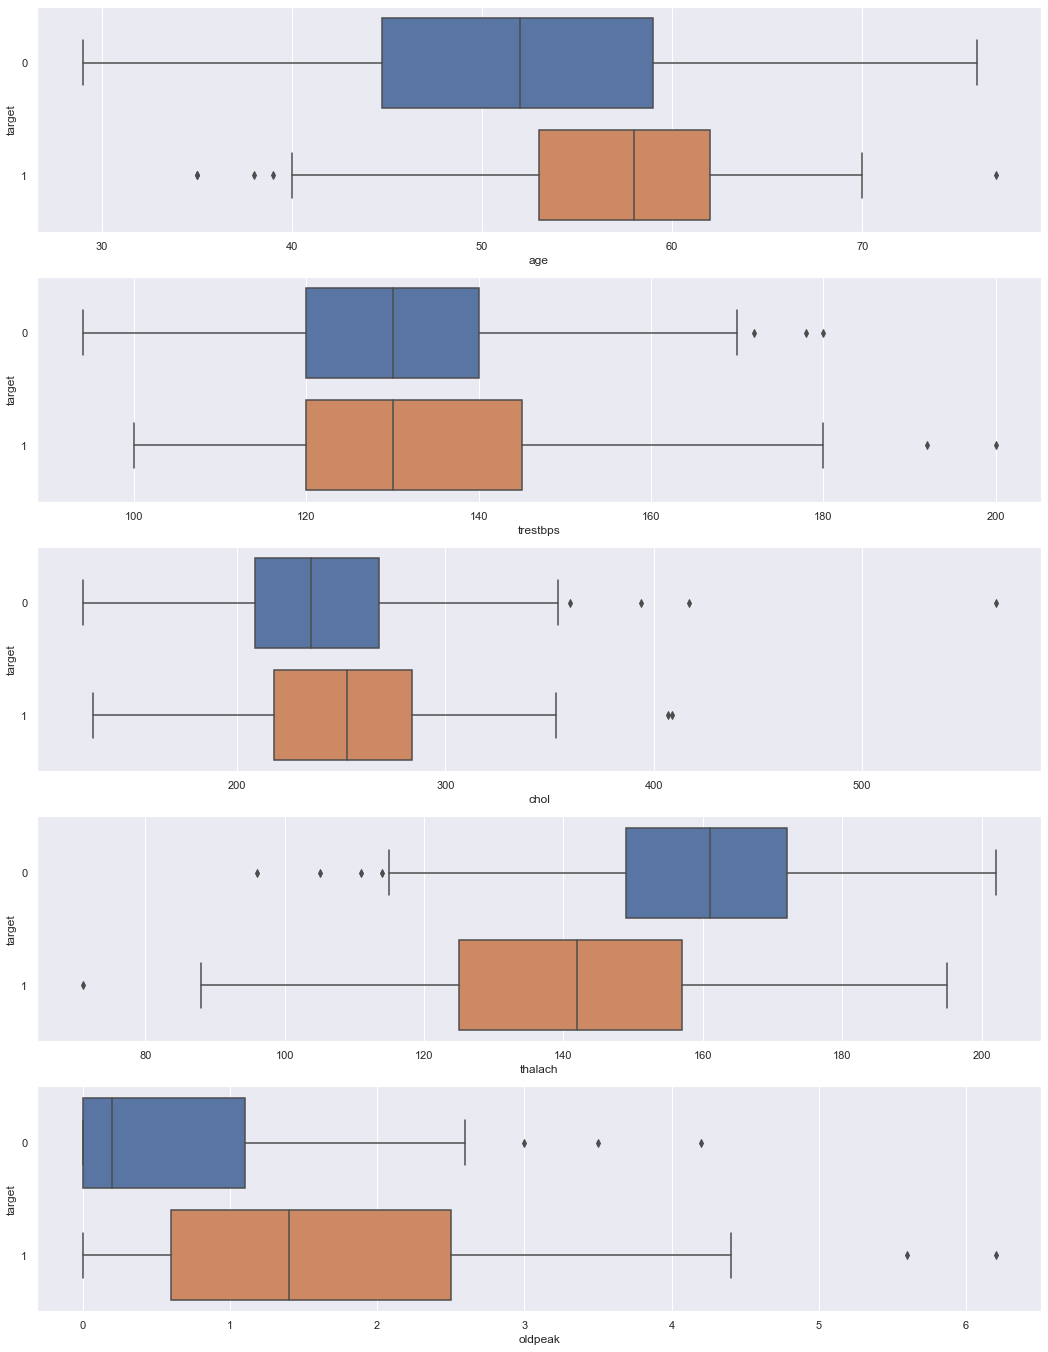

In [22]:
f, axes = plt.subplots(5, 1, figsize=(18, 24))

count = 0
for var in heartdata.select_dtypes(exclude = "category"):
    sb.boxplot(x = var, y = 'target', data = heartdata, ax = axes[count])
    count += 1

From the boxplots above, we can see the distribution of the continuous variables against the target variable. We can see that the boxplot of chol and trestbps of patients with and without heart disease are very similar, therefore suggesting that these two variables might not be that important in predicting whether a patient will have heart disease.

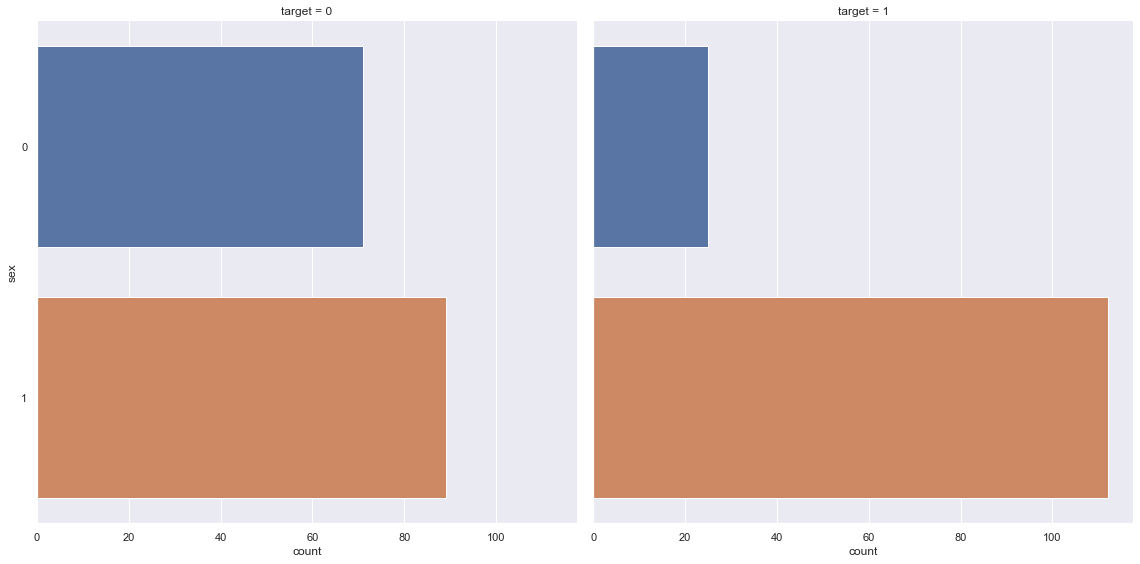

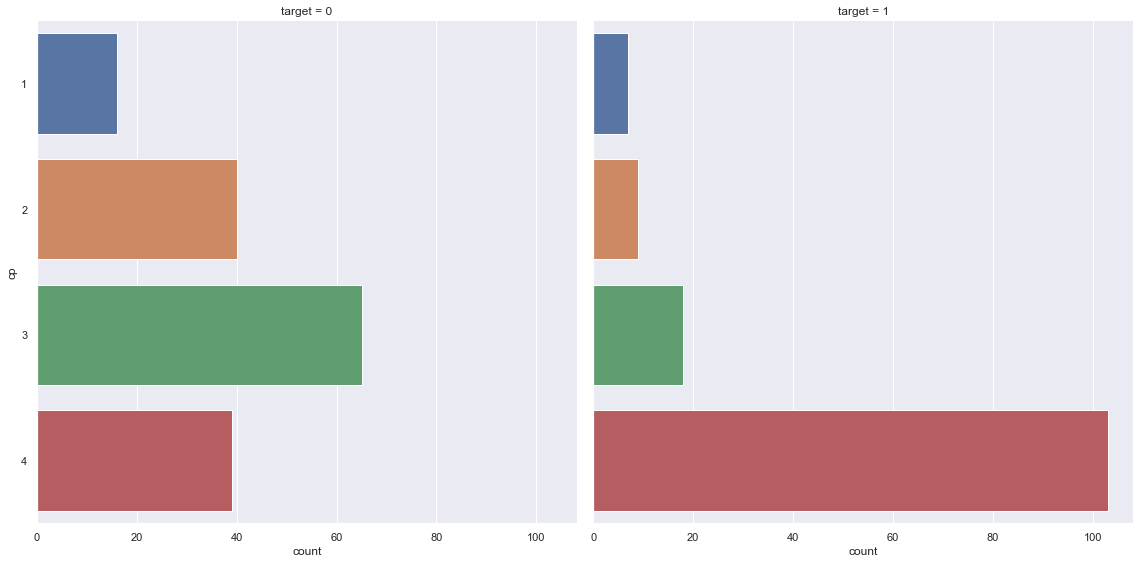

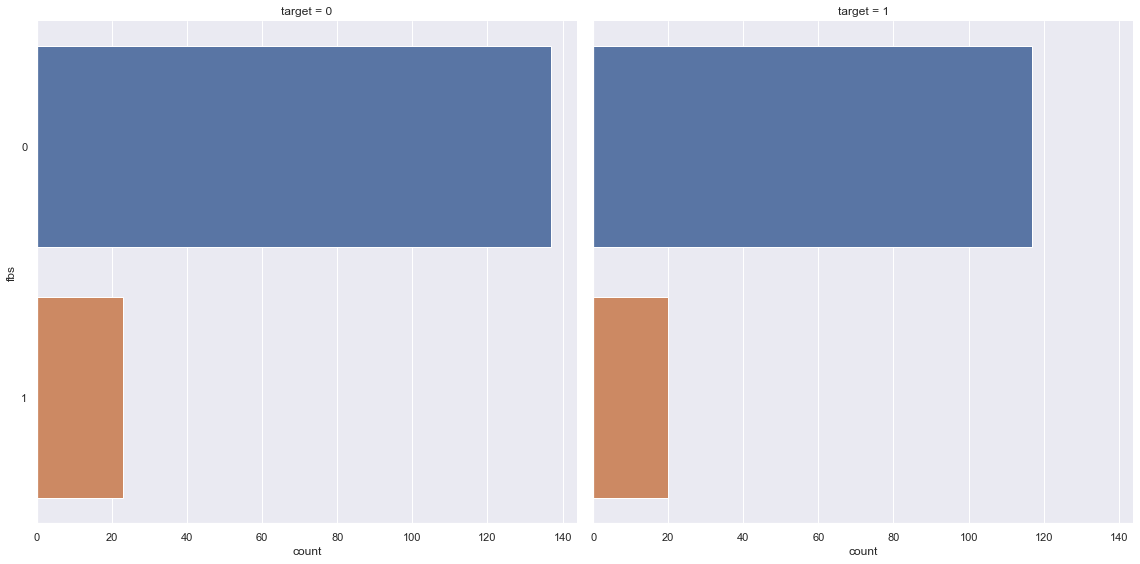

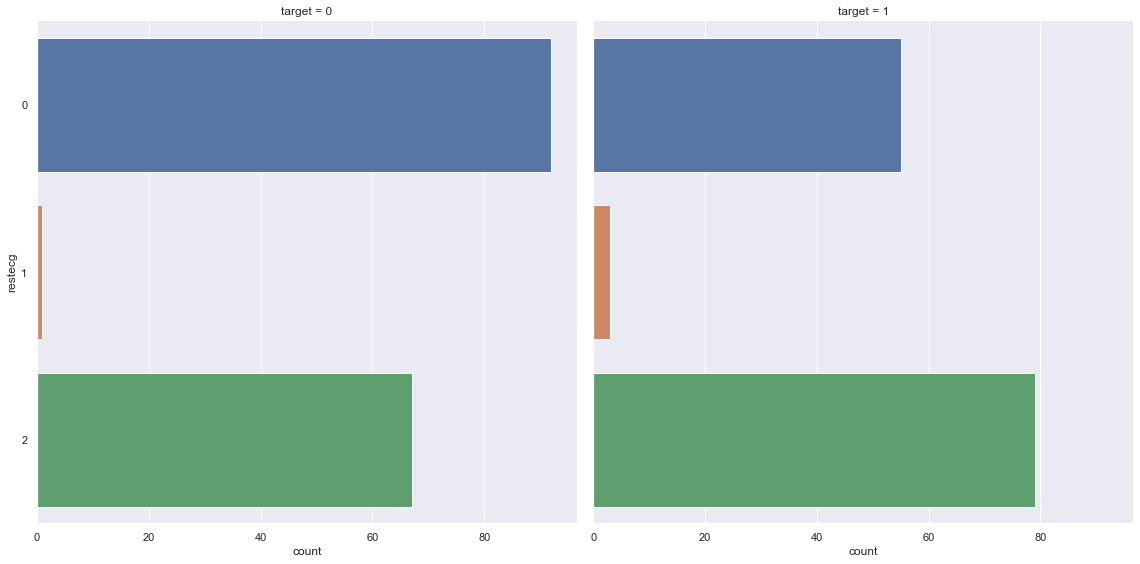

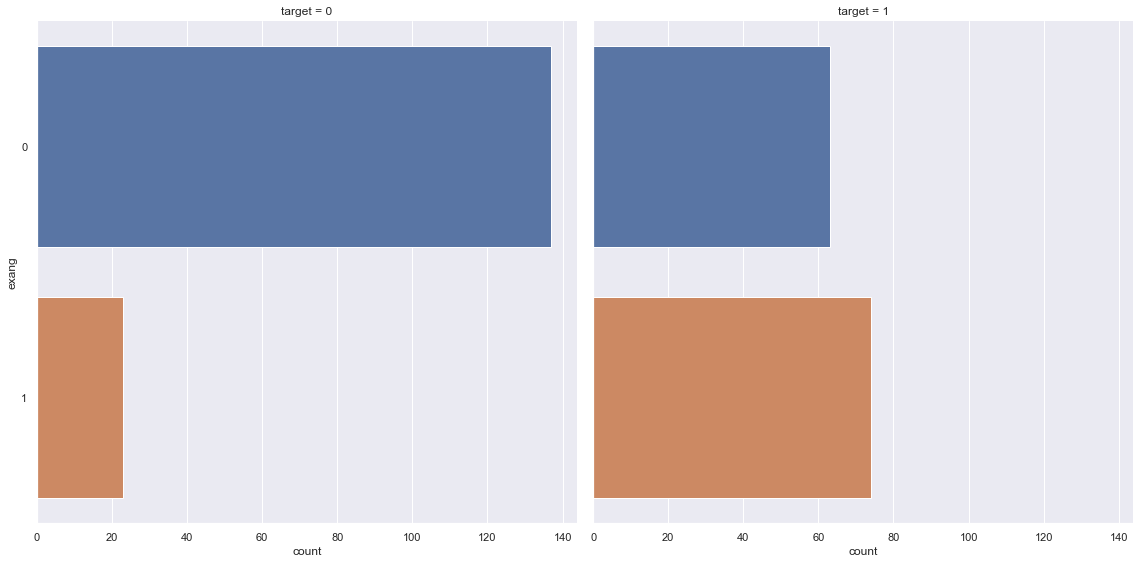

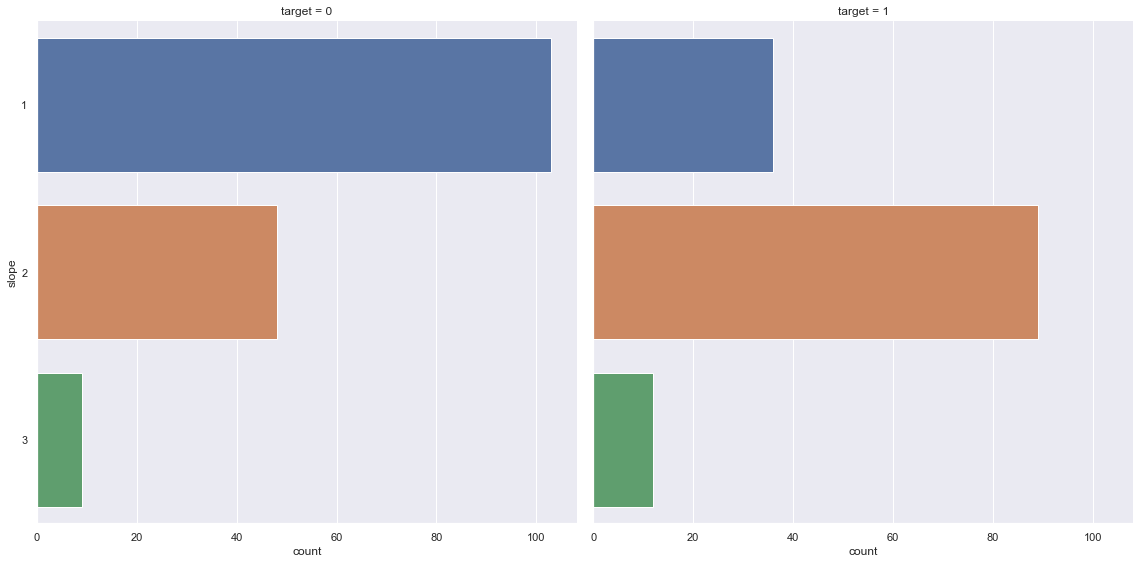

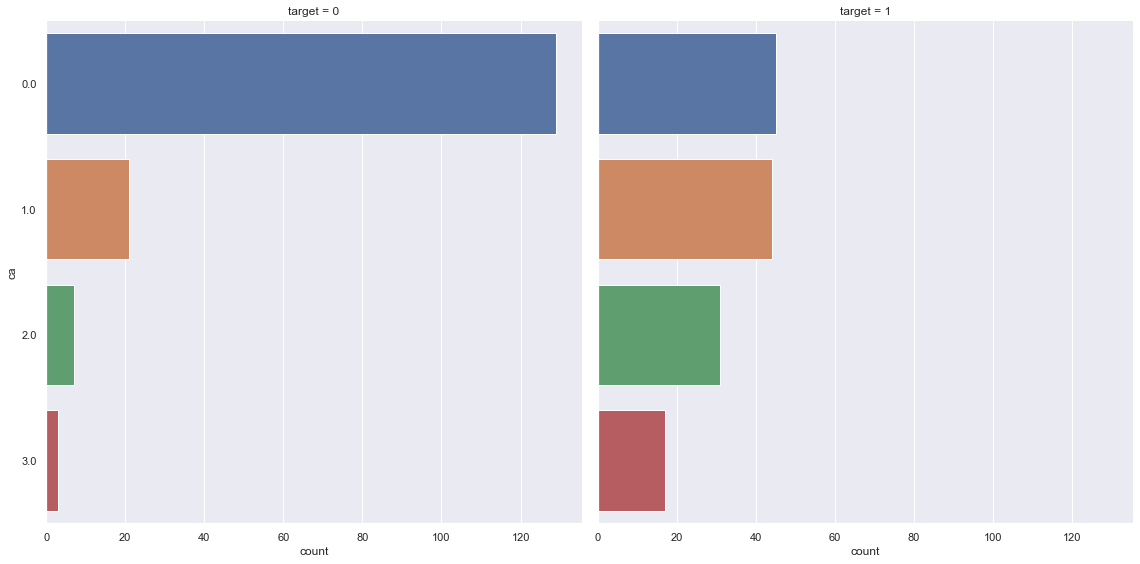

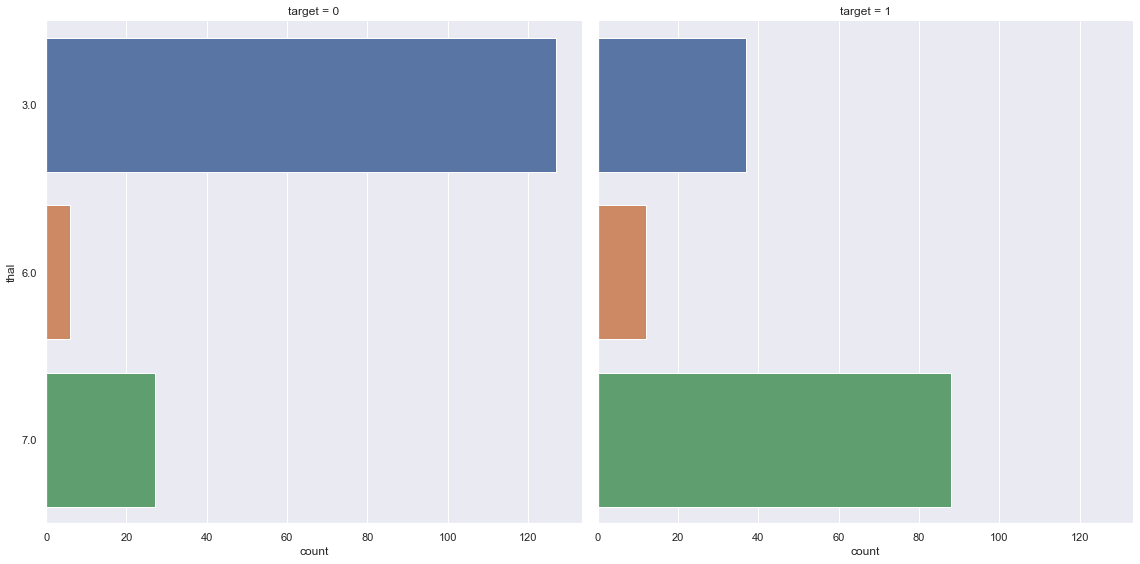

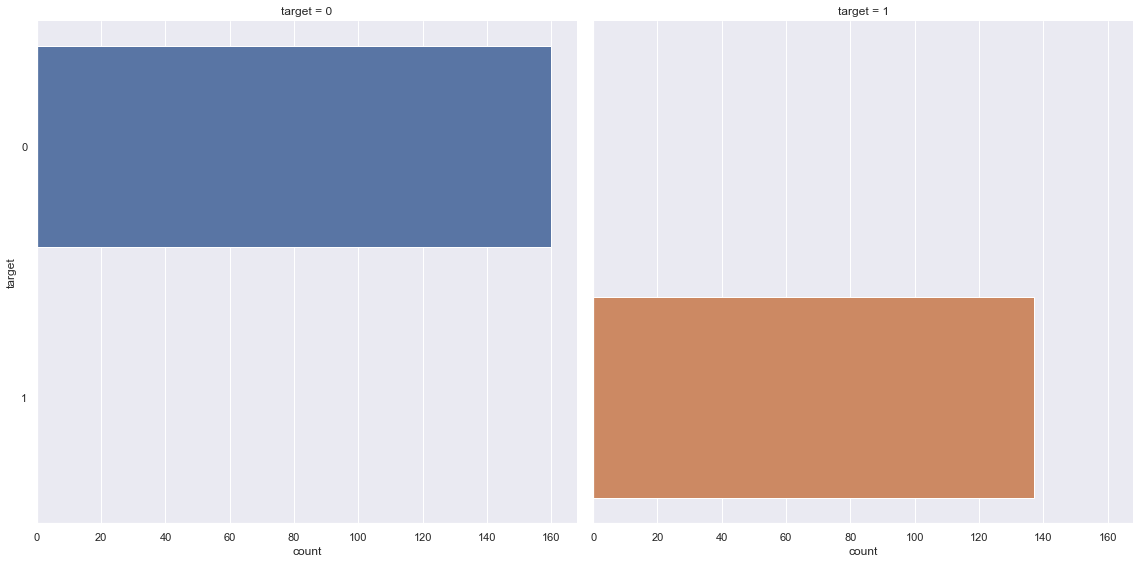

In [23]:
for var in heartdata.select_dtypes("category").columns:
    sb.catplot(y = var, data = heartdata, col = 'target', kind = 'count', col_wrap = 2, height = 8, orient='h')
  
# rename axes to male and female

From the bar chart above, we can see the distribution of categorical variables against the target variable. We can see that for thal, most of the patients with thal = 3 does not have heart disease, while most of the patients with thal = 7 has heart disease, this hints to us that thal might be an important variable in predicting whether a patient has heart disease.

# **Train Test Split**
In order to effectively assess the performance of our models, a 80/20 train test split is conducted on the dataset. This involves randomly splitting the data into two, one as a train set (80%) and another as the test set (20%).

The models will be developed and trained using the train set, and thereafter, assessed using the test set.

This allows us to better determine if our models are indeed able to predict the presence of heart disease well, and if so, it would indicate if the identified variables are important in the diagnosis.

In [24]:
# Extract response and predictor
predictors = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]
y_total = pd.DataFrame(heartdata["target"])  # response variable
X_total = pd.DataFrame(heartdata[predictors])  # predictor variables

# Split data in 80:20 ratio, into train and test set, using seed = 2022
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size = 0.20, random_state = seed)

# Check if split is done correctly
# print("shape of heartdata :", heartdata.shape)
# print("shape of train data :", X_train.shape, y_train.shape)
# print("shape of test data :", X_test.shape, y_test.shape)

# **4. CART**
Classification and Regression Tree (CART) is a supervised Machine Learning algorithm. It is used in both classification and regression algorithms (means that it works for predicting both categorical and continuous Y variable). The representation of the CART model is a binary tree, where at each split, a predictor variable (X variable) is used to make a decision. CART splits data into branches like these till it achieves a threshold value.

### Growing the Tree with Maximum Depth
Since we do not know the optimal parameters to build the initial regression tree with, we will allow the tree to grow to maximum, by not limiting the max_depth of the tree. However, this may cause an issue of overfitting the trainset data, with a very high trainset accuracy but a comparatively lower testset accuracy.

[Text(543.46875, 1037.7818181818182, 'thal <= 4.5\ngini = 0.497\nsamples = 237\nvalue = [128, 109]\nclass = 0'),
 Text(273.1875, 938.9454545454546, 'ca <= 0.5\ngini = 0.326\nsamples = 127\nvalue = [101, 26]\nclass = 0'),
 Text(151.125, 840.1090909090909, 'age <= 58.5\ngini = 0.142\nsamples = 91\nvalue = [84, 7]\nclass = 0'),
 Text(93.0, 741.2727272727273, 'trestbps <= 109.0\ngini = 0.029\nsamples = 69\nvalue = [68, 1]\nclass = 0'),
 Text(69.75, 642.4363636363637, 'oldpeak <= 0.3\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = 0'),
 Text(46.5, 543.6, 'sex <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(23.25, 444.76363636363635, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(69.75, 444.76363636363635, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(93.0, 543.6, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = 0'),
 Text(116.25, 642.4363636363637, 'gini = 0.0\nsamples = 63\nvalue = [63, 0]\nclass = 0'),
 Text(209.25, 741.2727272727273, 

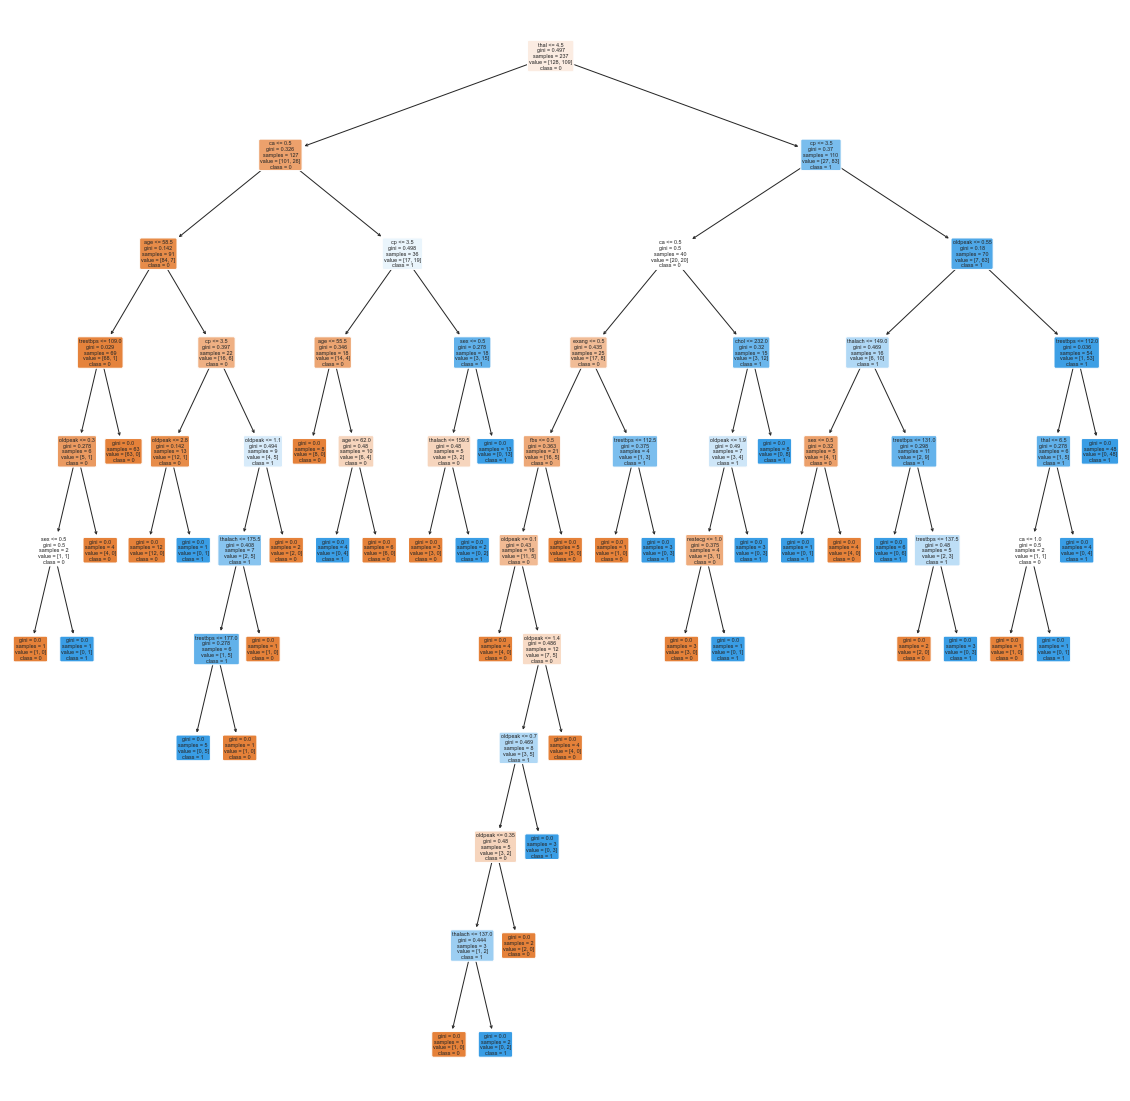

In [25]:
full_tree = DecisionTreeClassifier(random_state = seed) #ccp_alpha = 0 and min_samples_split = 2 by default, so no need to change
full_tree.fit(X_train,y_train)
f = plt.figure(figsize = (20,20))
plot_tree(full_tree, filled = True, rounded = True, feature_names = X_train.columns, class_names = ["0","1"])

**Accuracy Metrics**

Goodness of Fit of Model on train set 	
Classification Accuracy 	: 1.0
Goodness of Fit of Model on test set 	
Classification Accuracy 	: 0.7166666666666667


<AxesSubplot:>

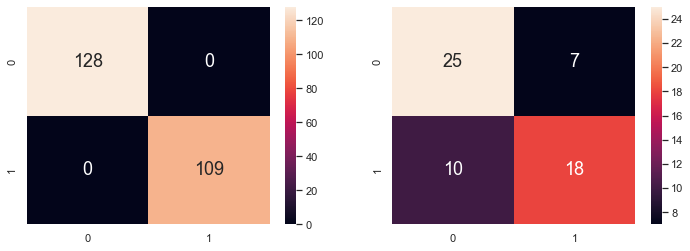

In [26]:
# Check accuracy metrics of full tree on test set
print("Goodness of Fit of Model on train set \t")
print("Classification Accuracy \t:", full_tree.score(X_train, y_train))
print("Goodness of Fit of Model on test set \t")
print("Classification Accuracy \t:", full_tree.score(X_test, y_test))

full_y_train_pred = full_tree.predict(X_train)
full_y_test_pred = full_tree.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, full_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, full_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

As we can see from the confusion matrix above, the fully grown CART is overfitted, with a 100% accuracy on the testset prediction. This is not something we want as it means that the model is learning the detail and noise in the training data to the extent that negatively impacts the performance of the model on new data, such as the test set, resulting in the testset accuracy being significantly lower.

### Pruning the Tree
Since we know the full decision tree overfits the trainset data, we will need to cut the tree down into a simpler optimal model, also known as pruning the tree. In order to determine which are the splits of the tree that we need to prune, we will look at a value called complexity parameter (cp). In Scikit-learn, it introduced a parameter called ccp_alpha (short for Cost Complexity Pruning Alpha) which can be used to prune a tree. Therefore, we will look at the ccp_alpha that gives a tree of maximum testset accuracy and use that ccp_alpha value for the optimal tree.

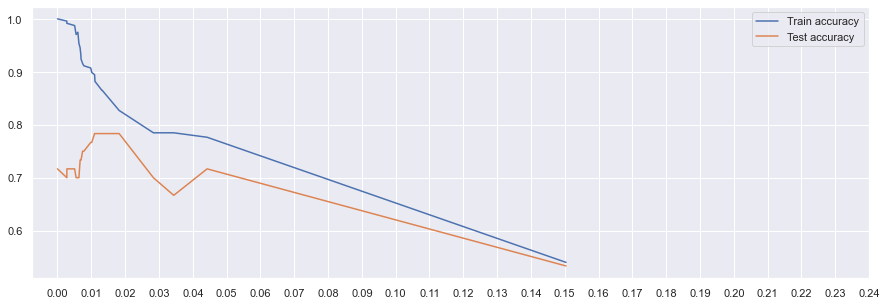

In [27]:
# Pruning the tree into optimal tree using parameter ccp_alpha
ccp_alphas = full_tree.cost_complexity_pruning_path(X_train, y_train)["ccp_alphas"]

train_acc = []
test_acc = []

for i in ccp_alphas:
  tree = DecisionTreeClassifier(ccp_alpha = i)
  tree.fit(X_train, y_train)
  y_train_pred = tree.predict(X_train)
  y_test_pred = tree.predict(X_test)
  train_acc.append(accuracy_score(y_train,y_train_pred))
  test_acc.append(accuracy_score(y_test,y_test_pred))

sb.set()
plt.figure(figsize=(15,5))
sb.lineplot(y = train_acc, x = ccp_alphas, label = "Train accuracy")
sb.lineplot(y = test_acc, x = ccp_alphas, label = "Test accuracy")
plt.xticks(ticks=np.arange(0.00,0.25,0.01))
plt.show()

From the graph above,we can see that between alpha = 0.01 and 0.02, we get the maximum test accuracy. So, we will build the optimal tree on ccp_alpha = 0.015

[Text(558.0, 951.3000000000001, 'thal <= 4.5\ngini = 0.497\nsamples = 237\nvalue = [128, 109]\nclass = 0'),
 Text(223.2, 679.5, 'ca <= 0.5\ngini = 0.326\nsamples = 127\nvalue = [101, 26]\nclass = 0'),
 Text(111.6, 407.70000000000005, 'gini = 0.142\nsamples = 91\nvalue = [84, 7]\nclass = 0'),
 Text(334.79999999999995, 407.70000000000005, 'cp <= 3.5\ngini = 0.498\nsamples = 36\nvalue = [17, 19]\nclass = 1'),
 Text(223.2, 135.89999999999998, 'gini = 0.346\nsamples = 18\nvalue = [14, 4]\nclass = 0'),
 Text(446.4, 135.89999999999998, 'gini = 0.278\nsamples = 18\nvalue = [3, 15]\nclass = 1'),
 Text(892.8, 679.5, 'cp <= 3.5\ngini = 0.37\nsamples = 110\nvalue = [27, 83]\nclass = 1'),
 Text(781.1999999999999, 407.70000000000005, 'ca <= 0.5\ngini = 0.5\nsamples = 40\nvalue = [20, 20]\nclass = 0'),
 Text(669.5999999999999, 135.89999999999998, 'gini = 0.435\nsamples = 25\nvalue = [17, 8]\nclass = 0'),
 Text(892.8, 135.89999999999998, 'gini = 0.32\nsamples = 15\nvalue = [3, 12]\nclass = 1'),
 Text(

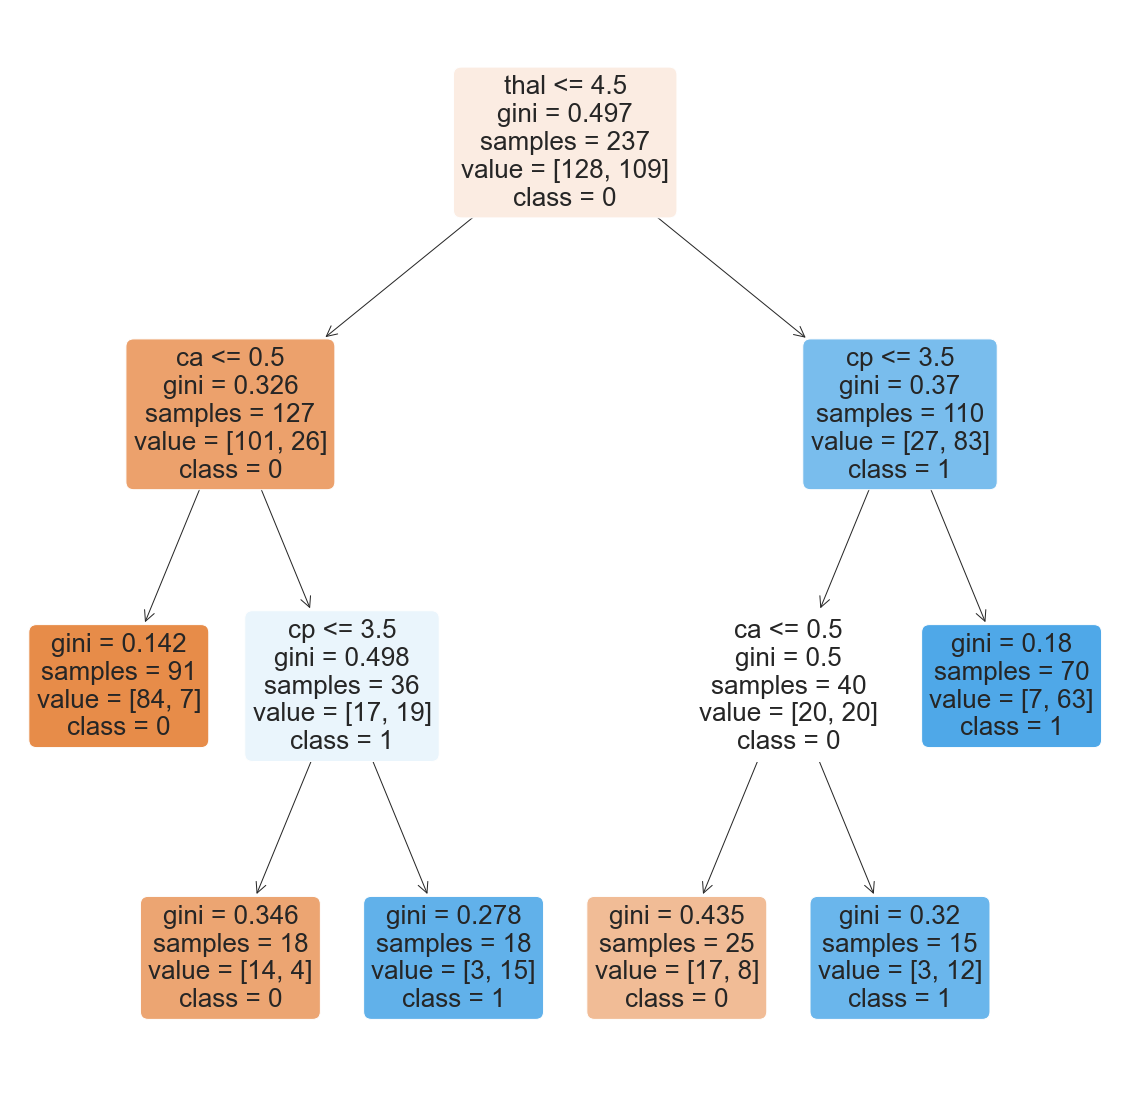

In [28]:
optimal_tree = DecisionTreeClassifier(ccp_alpha=0.015,random_state=seed)
optimal_tree.fit(X_train,y_train)
f = plt.figure(figsize = (20,20))
plot_tree(optimal_tree, filled = True, rounded = True, feature_names = X_train.columns, class_names = ["0","1"])

**Accuracy Metrics**

Goodness of Fit of Model on train set 	
Classification Accuracy 	: 0.8649789029535865
Goodness of Fit of Model on test set 	
Classification Accuracy 	: 0.7833333333333333


<AxesSubplot:>

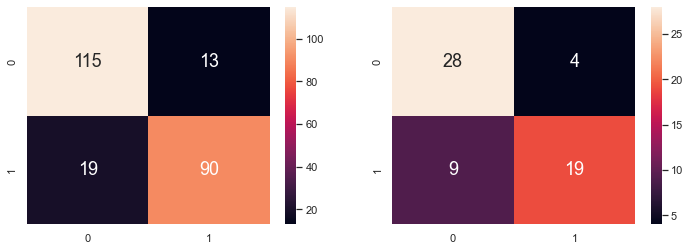

In [29]:
# Check accuracy metrics of full tree on test set
print("Goodness of Fit of Model on train set \t")
print("Classification Accuracy \t:", optimal_tree.score(X_train, y_train))
print("Goodness of Fit of Model on test set \t")
print("Classification Accuracy \t:", optimal_tree.score(X_test, y_test))

full_y_train_pred = optimal_tree.predict(X_train)
full_y_test_pred = optimal_tree.predict(X_test)

cart_matrix_train = confusion_matrix(y_train, full_y_train_pred)
cart_matrix_test = confusion_matrix(y_test, full_y_test_pred)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(cart_matrix_train,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(cart_matrix_test, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

From the result above, we can see that the optimal CART model has a much higher testset accuracy than the overfitted fully grown CART model.

###Variable Importance
Since the main object of this study is to determine the key contributing factors toward heart disease, we can study the variable importance of each model and find out which factors are contributes more towards heart disease.


In [30]:
# Variable importance
var_impt_CART = pd.Series(optimal_tree.feature_importances_,index=heartdata.columns.values[0:-1]).sort_values(ascending=False)
var_impt_CART

thal        0.545658
cp          0.227637
ca          0.226705
age         0.000000
sex         0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
dtype: float64

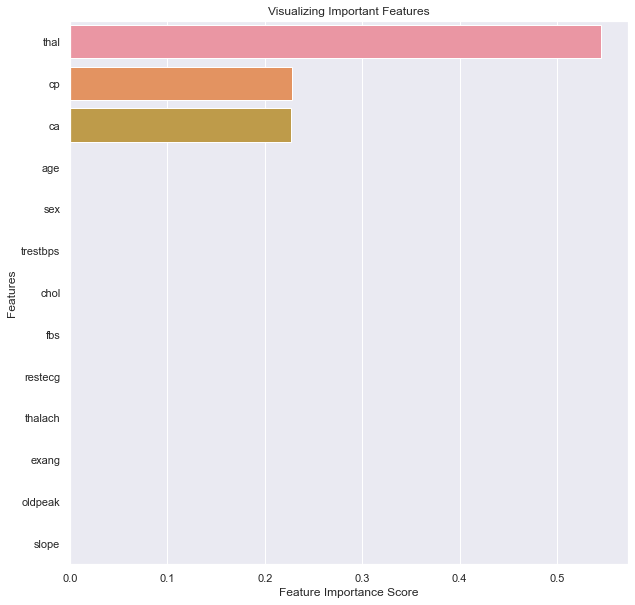

In [31]:
f = plt.figure(figsize = (10,10))
sb.barplot(x=var_impt_CART, y=var_impt_CART.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

From the variable importance plot shown above, we can see that the optimal classification tree only made use of 3 variables in its splits, with thal being the most important variable, followed by cp and ca, in determining whether an individual will get a heart disease.

# **5. Random Forest**
Random forest is a supervised Machine Learning Algorithm that is used widely in Classification and Regression Model, which is same as CART. (meaning that they can predict both categorical and continuous Y variables). It makes use of bagging (bootstrap aggregating) and random subset feature selection. Through bagging, it continuously randomly select with replacement from the existing dataset and build regression trees out of the randomly selected data. Each tree is built under the condition where at each split of the tree, it only allows the tree to pick from a randomly selected subset of predictor variables, this prevents dominant predictor variables from dominating and generating identical trees. In order to generate a prediction from the random forest model, the prediction from each regression tree is aggregated (mean for continuous Y and mode for categorical Y) to produce a final prediction for the random forest model.

###Model Development
Studies have shown that with the computational power of computers nowadays, it is often sufficient for us to use 500 regression trees in our model to build an optimal random forest model, thus we will build our random forest model on n_estimators = 500, which means our random forest will have 500 regression trees to aggregate.

In [32]:
# Create Model
rf_model = RandomForestClassifier(n_estimators = 500, random_state = seed)
rf_model.fit(X_train,y_train)

/var/folders/6s/6xb1_8nd59n15xks2twrynn40000gn/T/ipykernel_27544/1675748026.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train,y_train)


RandomForestClassifier(n_estimators=500, random_state=2022)

**Accuracy Metrics**

Goodness of Fit of Model on train set 	
Classification Accuracy 	: 1.0
Goodness of Fit of Model on test set 	
Classification Accuracy 	: 0.8


<AxesSubplot:>

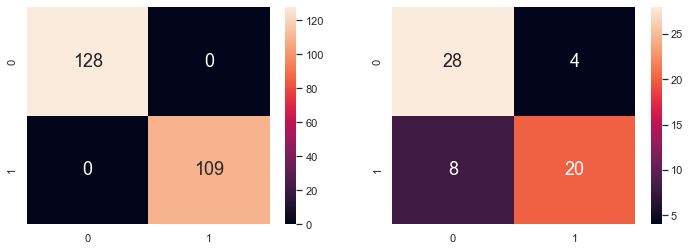

In [33]:
y_train_pred=rf_model.predict(X_train)
y_test_pred=rf_model.predict(X_test)

# Check accuracy metrics of full tree on test set
print("Goodness of Fit of Model on train set \t")
print("Classification Accuracy \t:", metrics.accuracy_score(y_train, y_train_pred))
print("Goodness of Fit of Model on test set \t")
print("Classification Accuracy \t:", metrics.accuracy_score(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
rf_matrix_train = confusion_matrix(y_train, y_train_pred)
rf_matrix_test = confusion_matrix(y_test, y_test_pred)
sb.heatmap(rf_matrix_train,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(rf_matrix_test, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

From the confusion matrix above, we can see that the random forest model performs better than the CART model (a single regression tree), as seen in a higher accuracy in trainset and testset

###Variable importance

In [34]:
var_impt_rf = pd.Series(rf_model.feature_importances_,index=heartdata.columns.values[0:-1]).sort_values(ascending=False)
var_impt_rf

thal        0.144634
ca          0.136648
cp          0.122994
thalach     0.110990
oldpeak     0.105454
age         0.086590
trestbps    0.074758
chol        0.073552
exang       0.049668
slope       0.033548
sex         0.031805
restecg     0.018685
fbs         0.010675
dtype: float64

No handles with labels found to put in legend.


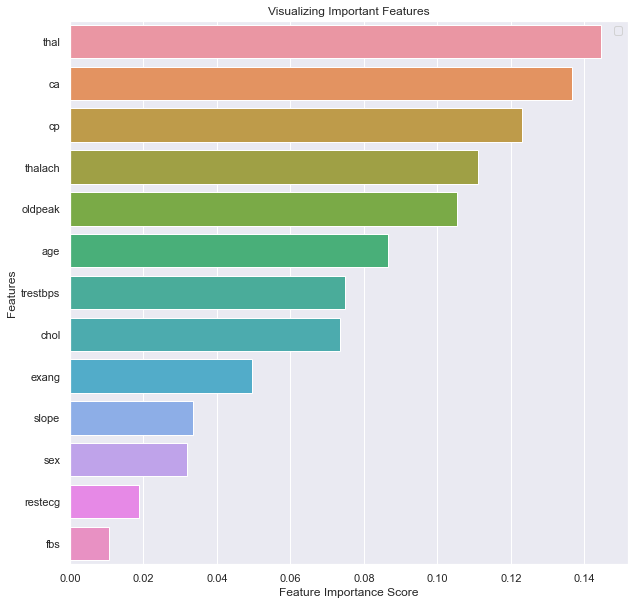

In [35]:
f = plt.figure(figsize = (10,10))
sb.barplot(x=var_impt_rf, y=var_impt_rf.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

For the random forest model, we can see that due to the random subset feature selection, all of the variables were used in a split at certain regression tree, however, they still have differing variable importance. It is important that we note that for both CART and random forest, thal is the most important variable

# **6. Data-driven Insights & Recommendations**

In [36]:
results = pd.DataFrame(columns=('Name', 'Class Acc', 'TPR', 'TNR', 'FPR', 'FNR'))
# Make empty table

In [37]:
def formatResults(matrix, name, res):
  TN = matrix[0][0]
  FP = matrix[0][1]
  FN = matrix[1][0]
  TP = matrix[1][1]

  class_acc = (TN + TP) / (TN + FP + FN + TP)
  TPR = TP/(TP + FN)
  TNR = TN/(TN + FP)
  FPR = FP/(FP + TN)
  FNR = FN/(FN + TP)
  return {'Name': name, 'Class Acc': class_acc, 'TPR': TPR, 'TNR': TNR, 'FPR': FPR, 'FNR': FNR}

In [38]:
# Tabulate the results
results = results.append(formatResults(cart_matrix_train, 'CART train', results), ignore_index = True)
results = results.append(formatResults(cart_matrix_test, 'CART test', results), ignore_index = True)
results = results.append(formatResults(rf_matrix_train, 'RF train', results), ignore_index = True)
results = results.append(formatResults(rf_matrix_test, 'RF test', results), ignore_index = True)

In [39]:
results

,Name,Class Acc,TPR,TNR,FPR,FNR
0,CART train,0.864979,0.825688,0.898438,0.101562,0.174312
1,CART test,0.783333,0.678571,0.875000,0.125000,0.321429
2,RF train,1.000000,1.000000,1.000000,0.000000,0.000000
3,RF test,0.800000,0.714286,0.875000,0.125000,0.285714


From the result above, we can see that the random forest model is superior compared to CART (a single regression tree), since it has a higher testset accuracy, true positive rate and a lower false negative rate as compared to CART.

Since random forest has proven to be the superior model, we will base our recommendation off the variable importance of random forest. Random Forest shows that "thal" is highly correlated with whether a person will have heart disease, followed by "ca" and "thalach". 

However, correlation doesn't necessarily mean causation. Therefore, we can use this information to conduct further research, which can help medical practitioners in terms of diagnosis and treatment since they would know what symptoms/vitals to look out for. 

This may also help pharmaceutical companies in determining the components of drugs that may be effective in dealing with heart disease. 

Furthermore, by identifying and confirming the key factors which lead to heart diseases, the general public can be warned to look out for these key factors and identify if they are at risk of heart diseases.